# Vecteurs

In [1]:
import numpy as np

In [2]:
teta = np.array([1, 3, 8])
x = np.array([5, 8, 25])

In [3]:
teta * x

array([  5,  24, 200])

In [4]:
np.dot(teta, x)

229

In [5]:
y = np.dot(teta, x) + 28
y

257

In [6]:
def h(x):
    teta = np.array([1, 3, 8])
    teta0 = 28
    y = np.dot(teta, x) + teta0
    return y

In [7]:
h(x)

257

In [8]:
y2 = np.array([3, 4])
np.append(y2, [6])

array([3, 4, 6])

In [9]:
def h2(x):
    x_ = np.append(x, [1])
    teta = np.array([1, 3, 8, 28])
    y = np.dot(x_, teta)
    return y

In [10]:
h2(x)

257

# MSE

In [11]:
def h(x):
    teta = np.array([1, 3, 8])
    teta0 = 28
    y = np.dot(teta, x) + teta0
    return y

In [12]:
X_test = np.array([
    [1, 3, 6],
    [-1, 2, -2],
    [0, 0, 3],
    [3, 3, 3]
])

y_test = np.array([78, 15, 55, 60])

In [13]:
h(X_test.T)

array([86, 17, 52, 64])

In [14]:
y_predict = h(X_test.T)

In [15]:
print(y_predict, y_test)

[86 17 52 64] [78 15 55 60]


In [16]:
mse = ((86 - 78)**2 + (17 - 15)**2 + (55 - 52)**2 + (60 - 64)**2)/ 4

In [17]:
rmse = np.sqrt(mse)

In [18]:
print(mse, rmse)

23.25 4.8218253804964775


In [19]:
np.mean((y_predict - y_test)**2)

23.25

In [20]:
def mse_fn(y_predict, y_test):
    return np.mean((y_predict - y_test)**2)

In [21]:
def rmse_fn(y_predict, y_test):
    return np.sqrt(np.mean((y_predict - y_test)**2))

In [22]:
mse_fn(y_predict, y_test)

23.25

In [23]:
rmse_fn(y_predict, y_test)

4.8218253804964775

# Linear regression

In [24]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

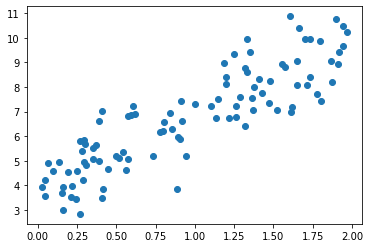

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [26]:
print(X[:10])

[[1.79478464]
 [0.40721617]
 [1.10391352]
 [0.56269998]
 [0.57336282]
 [1.65082112]
 [1.14770465]
 [0.15597189]
 [0.39104351]
 [1.47063186]]


In [27]:
print(y[:10])

[[9.87249523]
 [7.02342597]
 [7.24650162]
 [4.64259377]
 [5.08574774]
 [8.09399734]
 [7.50316892]
 [3.6936657 ]
 [4.99365812]
 [7.36388338]]


In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91131278]), array([[2.94752641]]))

In [29]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)
y_predict

array([[3.91131278],
       [9.80636559]])

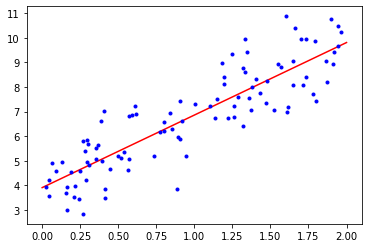

In [30]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

## Exemple profit par population de ville

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv(
    "data/univariate_linear_regression_dataset.csv",
    header=None,
    names=[
        "population_en_10k",
        "revenu_en_10k$"
    ]
)
df.head()

,population_en_10k,revenu_en_10k$
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
df.shape

(97, 2)

In [34]:
X_train = df.loc[:90, ["population_en_10k"]].to_numpy()
X_test = df.loc[90:, ["population_en_10k"]].to_numpy()

y_train = df.loc[:90, ["revenu_en_10k$"]].to_numpy()
y_test = df.loc[90:, ["revenu_en_10k$"]].to_numpy()

In [35]:
X_test

array([[ 5.7077],
       [ 7.6366],
       [ 5.8707],
       [ 5.3054],
       [ 8.2934],
       [13.394 ],
       [ 5.4369]])

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg_p = LinearRegression()
lin_reg_p.fit(X_train, y_train)
lin_reg_p.intercept_, lin_reg_p.coef_

(array([-3.91621878]), array([[1.20642909]]))

In [37]:
y_predict = lin_reg_p.predict(X_test)

In [38]:
y_predict, y_test

(array([[ 2.96971656],
        [ 5.29679764],
        [ 3.16636451],
        [ 2.48437014],
        [ 6.08918027],
        [12.24269252],
        [ 2.64301556]]),
 array([[1.8451 ],
        [4.2959 ],
        [7.2029 ],
        [1.9869 ],
        [0.14454],
        [9.0551 ],
        [0.61705]]))

In [39]:
X_droite = np.array([[0], [25]])
y_droite = lin_reg_p.predict(X_droite)

/tmp/ipykernel_9452/903653442.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_train, y_train, "b.", color="red");
/tmp/ipykernel_9452/903653442.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_test, y_test, "b.", color="blue");
/tmp/ipykernel_9452/903653442.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_test, y_predict, "b.", color="green");
/tmp/ipykernel_9452/903653442.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_droite, y_droite, "r-", color="black");


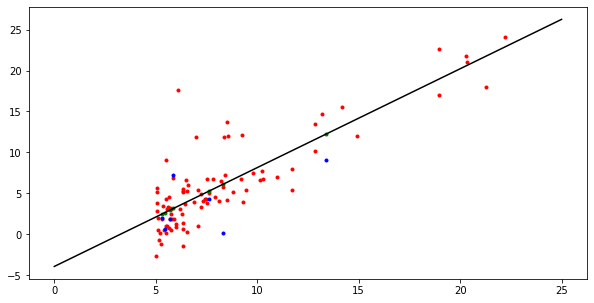

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, "b.", color="red");
plt.plot(X_test, y_test, "b.", color="blue");
plt.plot(X_test, y_predict, "b.", color="green");
plt.plot(X_droite, y_droite, "r-", color="black");
plt.show();

In [41]:
mse_fn(y_predict, y_test)

9.77309776327056

In [42]:
rmse_fn(y_predict, y_test)

3.126195413481147

# Body data

In [43]:
import pandas as pd

dtype = {
    "bia_di": float,
    "bii_di": float,
    "bit_di": float,
    "che_de": float,
    "che_di": float,
    "elb_di": float,
    "wri_di": float,
    "kne_di": float,
    "ank_di": float,
    "sho_gi": float,
    "che_gi": float,
    "wai_gi": float,
    "nav_gi": float,
    "hip_gi": float,
    "thi_gi": float,
    "bic_gi": float,
    "for_gi": float,
    "kne_gi": float,
    "cal_gi": float,
    "ank_gi": float,
    "wri_gi": float,
    "age": float,
    "wgt": float,
    "hgt": float,
    "sex": float
}
df = pd.read_csv(
    "data/Body_measurements_of_507_physically_active_individuals.csv",
    dtype=dtype
)
_ = df.pop("Unnamed: 0")


In [44]:
percent_missing = df.isna().sum() * 100 / len(df)
percent_missing

bia_di    0.0
bii_di    0.0
bit_di    0.0
che_de    0.0
che_di    0.0
elb_di    0.0
wri_di    0.0
kne_di    0.0
ank_di    0.0
sho_gi    0.0
che_gi    0.0
wai_gi    0.0
nav_gi    0.0
hip_gi    0.0
thi_gi    0.0
bic_gi    0.0
for_gi    0.0
kne_gi    0.0
cal_gi    0.0
ank_gi    0.0
wri_gi    0.0
age       0.0
wgt       0.0
hgt       0.0
sex       0.0
dtype: float64

In [45]:
df.dtypes

bia_di    float64
bii_di    float64
bit_di    float64
che_de    float64
che_di    float64
elb_di    float64
wri_di    float64
kne_di    float64
ank_di    float64
sho_gi    float64
che_gi    float64
wai_gi    float64
nav_gi    float64
hip_gi    float64
thi_gi    float64
bic_gi    float64
for_gi    float64
kne_gi    float64
cal_gi    float64
ank_gi    float64
wri_gi    float64
age       float64
wgt       float64
hgt       float64
sex       float64
dtype: object

In [46]:
X = df[
    ["bia_di", "bii_di", "bit_di", "che_de", "che_di", "elb_di", "wri_di", "kne_di", "ank_di", "sho_gi", "che_gi", "wai_gi", "nav_gi", "hip_gi", "thi_gi", "bic_gi", "for_gi", "kne_gi", "cal_gi", "ank_gi", "wri_gi", "age", "hgt", "sex"]
].values

In [47]:
y = df["wgt"].values

In [48]:
X

array([[ 42.9,  26. ,  31.5, ...,  21. , 174. ,   1. ],
       [ 43.7,  28.5,  33.5, ...,  23. , 175.3,   1. ],
       [ 40.1,  28.2,  33.3, ...,  28. , 193.5,   1. ],
       ...,
       [ 34.7,  24.9,  24.7, ...,  33. , 160.7,   0. ],
       [ 38.5,  29. ,  32.9, ...,  33. , 174. ,   0. ],
       [ 35.6,  29. ,  29. , ...,  38. , 163.8,   0. ]])

In [49]:
y[:10]

array([65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62. , 81.6])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# X_train, X_test, y_train, y_test

In [53]:
X_train.shape

(405, 24)

In [54]:
#%%timeit
from sklearn.linear_model import LinearRegression
lin_reg_p = LinearRegression()
lin_reg_p.fit(X_train, y_train)
y_train_p = lin_reg_p.predict(X_train)
lin_reg_p.intercept_, lin_reg_p.coef_

(-119.24115680192175,
 array([-0.08087949,  0.15133074, -0.09154895,  0.32467182,  0.17250875,
         0.22620247,  0.19349686,  0.43132735, -0.02691931,  0.11381653,
         0.10938755,  0.37716633, -0.01364977,  0.224708  ,  0.22967511,
         0.03617196,  0.60432303,  0.11992212,  0.39080949,  0.09173795,
        -0.37395239, -0.0508679 ,  0.30529481, -1.49459481]))

In [55]:
y_predict = lin_reg_p.predict(X_test)
test_df = pd.DataFrame()
test_df["y_predict"] = y_predict
test_df["y_test"] = y_test

In [56]:
y_predict[:5], y_test[:5]

(array([74.88398358, 67.51806576, 57.24265041, 70.79053697, 57.27217722]),
 array([73.6, 67.3, 60. , 67.7, 54.5]))

In [57]:
test_df.head(10)                                                               

,y_predict,y_test
0,74.883984,73.6
1,67.518066,67.3
2,57.242650,60.0
3,70.790537,67.7
4,57.272177,54.5
5,72.031004,72.0
6,54.921004,55.7
7,99.555253,108.6
8,54.397574,55.4
9,74.581883,76.8


In [58]:
rmse_fn(y_train_p, y_train)

2.027348014345901

In [59]:
rmse_fn(y_predict, y_test)

2.184147761563231

# Standarisation

In [60]:
df_s = df.copy()
X = df_s[
    ["bia_di", "bii_di", "bit_di", "che_de", "che_di", "elb_di", "wri_di", "kne_di", "ank_di", "sho_gi", "che_gi", "wai_gi", "nav_gi", "hip_gi", "thi_gi", "bic_gi", "for_gi", "kne_gi", "cal_gi", "ank_gi", "wri_gi", "age", "hgt", "sex"]
].values
y = df_s["wgt"].values

In [61]:
df_s.head()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21.0,65.6,174.0,1.0
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23.0,71.8,175.3,1.0
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28.0,80.7,193.5,1.0
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23.0,72.6,186.5,1.0
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22.0,78.8,187.2,1.0


In [62]:
col = df[["bia_di"]]

In [63]:
col.head(5)

,bia_di
0,42.9
1,43.7
2,40.1
3,44.3
4,42.5


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(col)
print(scaler.mean_)
print(scaler.scale_)

[38.81143984]
[3.05611349]


In [65]:
scaler.transform(col)[:5]

array([[1.33782995],
       [1.59960033],
       [0.42163361],
       [1.79592812],
       [1.20694476]])

In [66]:
scaler2 = StandardScaler()
scaler2.fit(X)
print(scaler2.mean_)
print(scaler2.scale_)

[ 38.81143984  27.82998028  31.98047337  19.2260355   27.97376726
  13.3852071   10.54260355  18.81065089  13.86331361 108.19506903
  93.33353057  76.97948718  85.65384615  96.68086785  56.85581854
  31.16962525  25.94299803  36.20295858  36.07830375  22.15739645
  16.0974359   30.18145957 171.14378698   0.48717949]
[ 3.05611349  2.2041311   2.02891168  2.51339462  2.73894446  1.35157082
  0.94342923  1.34626555  1.24612032 10.36459777 10.01772689 11.00182221
  9.41482946  6.6740311   4.4554889   4.24275045  2.82778642  2.61498698
  2.84485117  1.86049969  1.3795682   9.59899174  9.3979233   0.49983561]


In [67]:
X_s  = scaler2.transform(X)
X_s[:3]

array([[ 1.33782995, -0.8302502 , -0.23681335, -0.60716112,  0.00957768,
        -0.21101898, -0.15115448, -0.00791143,  0.18993863, -0.1924888 ,
        -0.38267469, -0.49805269, -1.18471038, -0.47660369, -1.20207202,
         0.31356422,  0.02015781, -0.65123023,  0.14823139,  0.721636  ,
         0.29180442, -0.9565025 ,  0.30391959,  1.02597835],
       [ 1.59960033,  0.30398361,  0.7489368 , -0.92545575,  1.03186931,
         0.45487287,  1.33279362,  1.32912048,  0.99242936,  0.22238499,
         0.36599814,  0.18365256,  0.08987458, -0.28181886, -1.20207202,
         0.76138693,  0.7274248 ,  0.11359193,  0.49974363,  1.25912601,
         0.65423667, -0.74814728,  0.44224802,  1.02597835],
       [ 0.42163361,  0.16787555,  0.65036179,  0.66601738,  1.36046305,
         0.38088489,  0.37882699,  0.66060452,  0.18993863,  0.66620347,
         0.41590966,  0.5654075 , -0.29250091, -0.25185197,  0.09969309,
         0.52569077,  1.0103316 ,  0.30479747,  0.42944118, -0.13834802,
  

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=42)

In [69]:
#%%timeit
from sklearn.linear_model import LinearRegression
lin_reg_p = LinearRegression()
lin_reg_p.fit(X_train, y_train)
y_train_p = lin_reg_p.predict(X_train)
lin_reg_p.intercept_, lin_reg_p.coef_

(69.19726525391737,
 array([-0.24717692,  0.3335528 , -0.18574474,  0.8160284 ,  0.47249187,
         0.30572866,  0.18255059,  0.58068115, -0.0335447 ,  1.17966255,
         1.09581459,  4.14951689, -0.12851027,  1.49970815,  1.02331491,
         0.15346859,  1.70889645,  0.31359479,  1.11179483,  0.17067843,
        -0.51589283, -0.48828051,  2.86913725, -0.74705171]))

In [70]:
y_predict = lin_reg_p.predict(X_test)
test_df = pd.DataFrame()
test_df["y_predict"] = y_predict
test_df["y_test"] = y_test

In [71]:
y_predict[:5], y_test[:5]

(array([74.88398358, 67.51806576, 57.24265041, 70.79053697, 57.27217722]),
 array([73.6, 67.3, 60. , 67.7, 54.5]))

In [72]:
test_df.head(5)

,y_predict,y_test
0,74.883984,73.6
1,67.518066,67.3
2,57.242650,60.0
3,70.790537,67.7
4,57.272177,54.5


In [73]:
rmse_fn(y_train_p, y_train)

2.0273480143459004

In [74]:
rmse_fn(y_predict, y_test)

2.1841477615632305

## 4.3 Régression polynomiale

In [83]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)

arr = np.array(
    [
        [1, 2, 3],
        [-1, -2, -3]
    ]
)
arr_poly = poly_features.fit_transform(arr)

arr_poly

array([[  1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,   2.,
          3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [ -1.,  -2.,  -3.,   1.,   2.,   3.,   4.,   6.,   9.,  -1.,  -2.,
         -3.,  -4.,  -6.,  -9.,  -8., -12., -18., -27.]])

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X.shape, X_poly.shape

((507, 24), (507, 324))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(2.789732911828551,
 array([-8.89865527e-01, -1.98525977e+00,  2.36795719e+00,  6.78513674e-01,
         2.84676114e+00,  9.30317612e+00,  1.05613134e+00,  3.17256007e-01,
         2.81119015e+00,  7.00825489e-01, -1.75197156e+00,  1.57785997e-01,
         8.07842370e-01, -7.38184281e-01,  6.68586897e-01,  2.28330489e+00,
        -3.51704430e+00, -3.85146504e+00,  1.64703421e+00, -5.10274318e+00,
         1.32646551e+00, -3.64382957e-01, -3.29666539e-01, -1.32372044e+01,
        -1.56838581e-02,  6.07245274e-02, -4.67954842e-02,  5.82856777e-02,
         1.59171293e-01,  6.39578707e-02,  1.20420536e-01,  1.85711674e-01,
        -6.96795331e-02, -3.03295725e-02, -7.98598881e-02,  1.62473338e-02,
        -6.68896732e-02,  7.93712869e-02, -4.47634812e-02,  1.40169683e-01,
        -5.42598164e-02, -9.26871552e-03, -1.16044916e-01,  6.07572499e-02,
        -2.13136603e-01,  2.53000450e-02,  2.73574235e-02, -9.81538032e-02,
         7.43181738e-02, -1.89047486e-01, -3.64432167e-02, -4.659224

In [78]:
y_train_p = lin_reg.predict(X_train)
y_predict = lin_reg.predict(X_test)

In [79]:
rmse_fn(y_train_p, y_train)

0.9916561305181157

In [80]:
rmse_fn(y_predict, y_test)

0.9748576748617496